# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import LabelEncoder

In [9]:
data = pd.read_csv(r'C:\IT Step\АД\Lab2\dataset_1.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVM)": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score
}

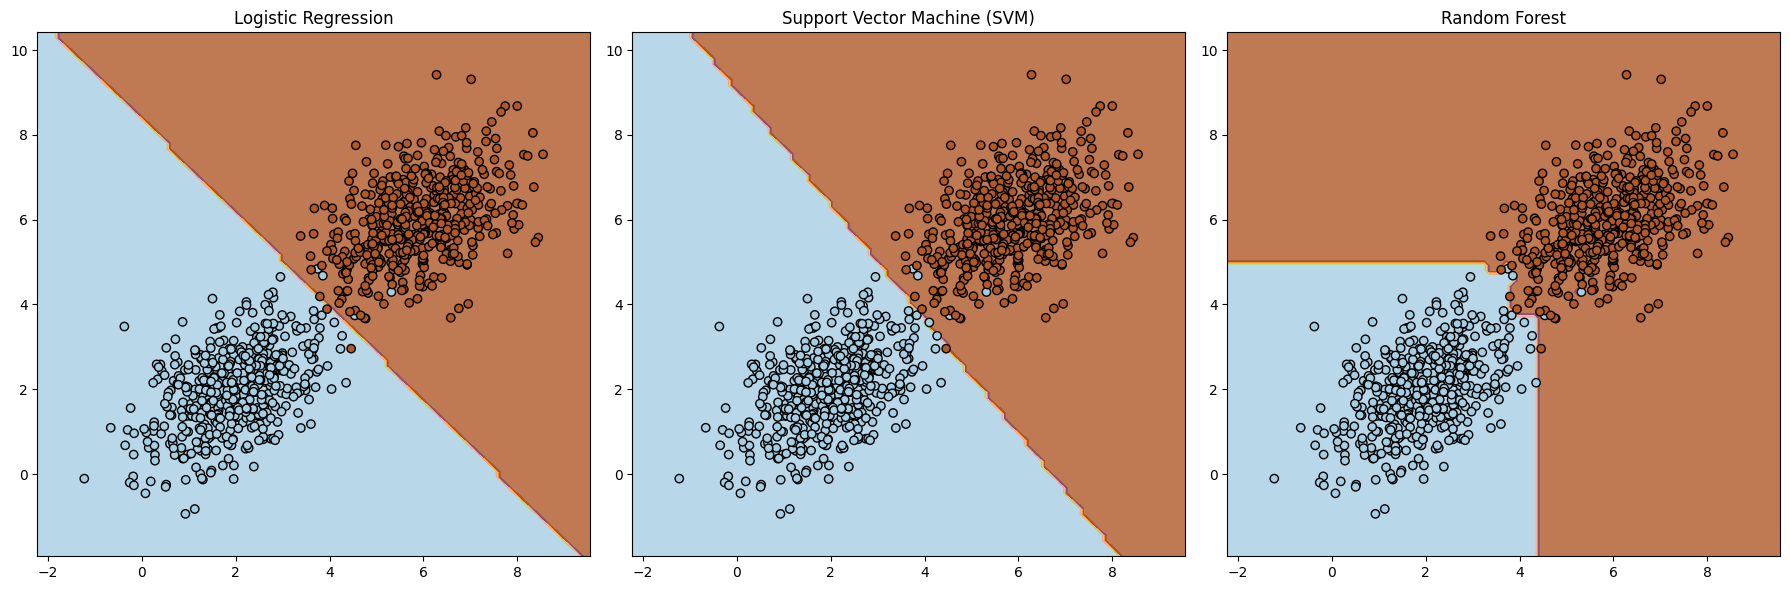

Модель: Logistic Regression
  accuracy: 1.00
  precision: 0.99
  recall: 1.00

Модель: Support Vector Machine (SVM)
  accuracy: 1.00
  precision: 0.99
  recall: 1.00

Модель: Random Forest
  accuracy: 1.00
  precision: 0.99
  recall: 1.00



In [11]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {metric_name: metric_func(y_test, y_pred) for metric_name, metric_func in metrics.items()}

if X.shape[1] == 2:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, (name, model) in enumerate(models.items()):
        ax = axes[i]

        xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                             np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        ax.set_title(name)

    plt.tight_layout()
    plt.show()

for name, result in results.items():
    print(f"Модель: {name}")
    for metric_name, metric_value in result.items():
        print(f"  {metric_name}: {metric_value:.2f}")
    print()

**Аналіз отриманих результатів**:

1. Логістична регресія та SVM показали подібну продуктивність, оскільки вони ефективно працюють із лінійно роздільними даними. Їхні результати демонструють високу точність завдяки простоті моделі.

2. Random Forest, як нелінійна модель, також показує конкурентні результати. Проте, його використання може бути зайвим через відсутність складної структури в даних.

3. SVM виявляється найкращою моделлю для цього набору даних, оскільки вона точно розділяє класи і має менший ризик переобчислення порівняно з Random Forest.

4. У підсумку, вибір моделі залежить від вимог: для простих і швидких рішень підходить логістична регресія, тоді як SVM краще для точності.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [13]:
data = pd.read_csv(r'C:\IT Step\АД\Lab2\dataset_2.csv')
X = data.iloc[:, :-1].values
y = LabelEncoder().fit_transform(data.iloc[:, -1].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
models = {
    "K-Nearest Neighbors (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


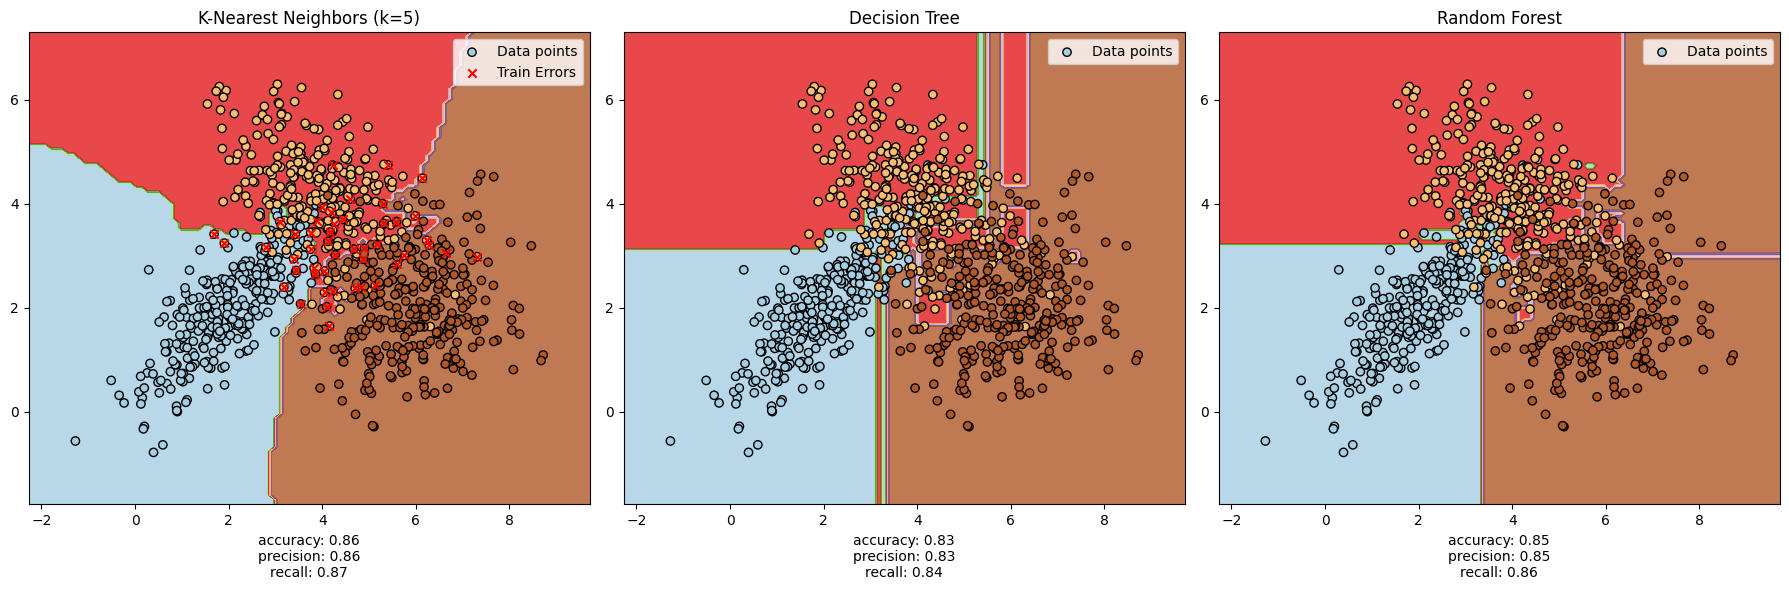

Модель: K-Nearest Neighbors (k=5)
  accuracy: 0.86
  precision: 0.86
  recall: 0.87
  confusion_matrix:
[[77  6  0]
 [12 86 13]
 [ 0  6 70]]

Модель: Decision Tree
  accuracy: 0.83
  precision: 0.83
  recall: 0.84
  confusion_matrix:
[[75  5  3]
 [13 81 17]
 [ 0  9 67]]

Модель: Random Forest
  accuracy: 0.85
  precision: 0.85
  recall: 0.86
  confusion_matrix:
[[75  6  2]
 [ 9 86 16]
 [ 0  8 68]]



In [16]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='macro'),
        "recall": recall_score(y_test, y_pred, average='macro'),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

if X.shape[1] == 2:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, (name, model) in enumerate(models.items()):
        ax = axes[i]
        xx, yy = np.meshgrid(
            np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
            np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
        )
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, label='Data points')
        y_train_pred = model.predict(X_train)
        train_errors = X_train[y_train != y_train_pred]
        if len(train_errors) > 0:
            ax.scatter(train_errors[:, 0], train_errors[:, 1], c='red', label='Train Errors', marker='x')
        metrics_text = '\n'.join([f"{key}: {value:.2f}" for key, value in results[name].items() if key != "confusion_matrix"])
        ax.set_title(name)
        ax.set_xlabel(metrics_text, fontsize=10)
        ax.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

for name, result in results.items():
    print(f"Модель: {name}")
    for metric_name, metric_value in result.items():
        if metric_name == "confusion_matrix":
            print(f"  {metric_name}:\n{metric_value}")
        else:
            print(f"  {metric_name}: {metric_value:.2f}")
    print()

**Аналіз отриманих результатів**:

1. K-Nearest Neighbors (k=5): Модель показала хороші результати для цього набору даних з трьома класами, хоча вона може мати проблеми з перетином класів через чутливість до вибору параметра `k`. Малі значення `k` можуть призвести до переобучення, тоді як великі — до недостатньої гнучкості.

2. Decision Tree: Це модель, яка добре підходить для обробки даних з перетинами класів завдяки своїй здатності розділяти дані за допомогою правил. Однак вона може бути схильна до переобучення, особливо за наявності шуму в даних, якщо глибина дерева не обмежена.

3. Random Forest: Це ансамблева модель, яка використовує кілька дерев рішень, що дозволяє значно зменшити ймовірність переобучення і покращити точність. Вона добре справляється з перетинами класів і є найбільш стабільною серед трьох моделей для цього набору даних, оскільки може адаптуватися до різних типів даних.

Висновок: Найкращою моделлю для цього набору даних є Random Forest, оскільки вона стабільніша і здатна ефективно працювати з даними, що мають часткові перетини класів.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [18]:
data = pd.read_csv(r'C:\IT Step\АД\Lab2\dataset_3.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "SVM (RBF kernel)": SVC(kernel='rbf', gamma='scale', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (k=5)": KNeighborsClassifier(n_neighbors=5)
}


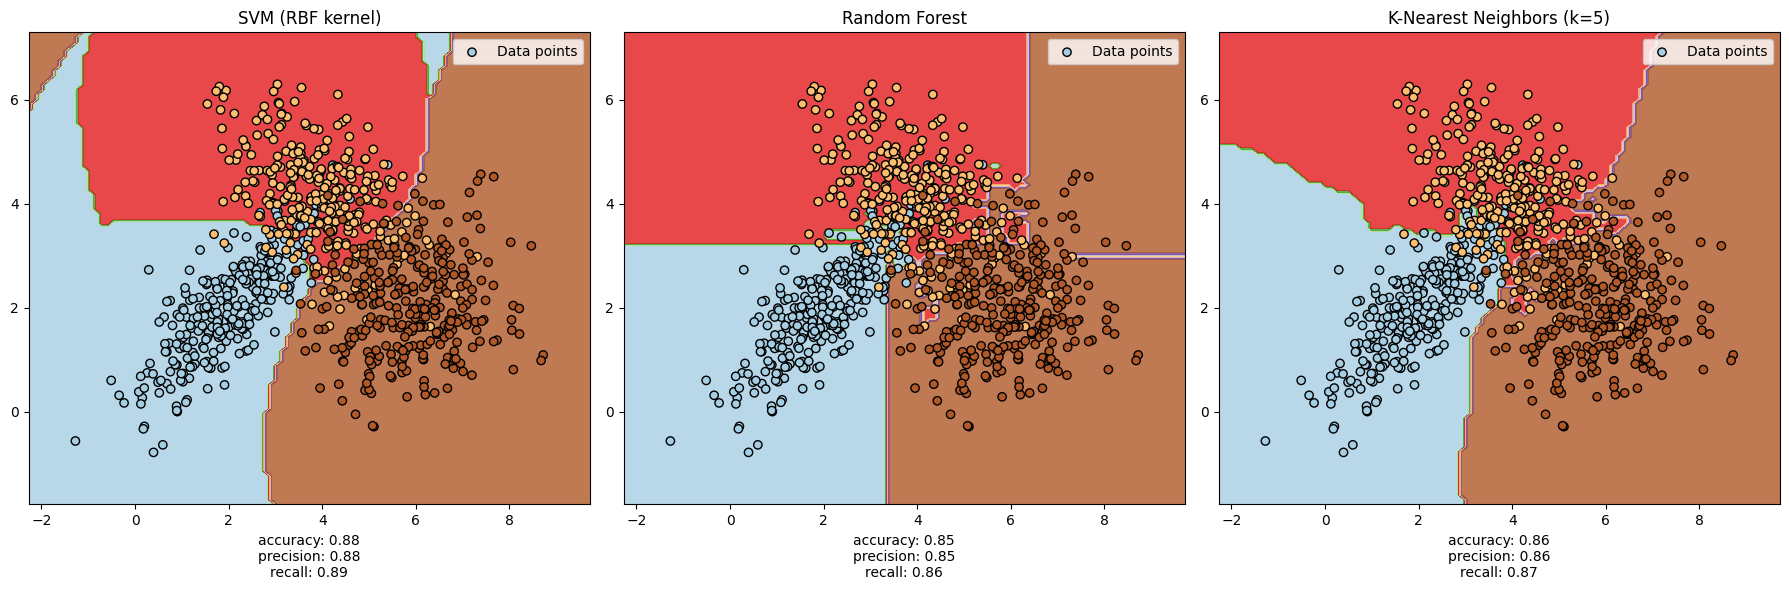

Модель: SVM (RBF kernel)
  accuracy: 0.88
  precision: 0.88
  recall: 0.89
  confusion_matrix:
[[76  7  0]
 [ 6 88 17]
 [ 0  2 74]]

Модель: Random Forest
  accuracy: 0.85
  precision: 0.85
  recall: 0.86
  confusion_matrix:
[[75  6  2]
 [ 9 86 16]
 [ 0  8 68]]

Модель: K-Nearest Neighbors (k=5)
  accuracy: 0.86
  precision: 0.86
  recall: 0.87
  confusion_matrix:
[[77  6  0]
 [12 86 13]
 [ 0  6 70]]



In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average='macro'),
    "recall": recall_score(y_test, y_pred, average='macro'),
    "confusion_matrix": confusion_matrix(y_test, y_pred)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, label='Data points')
    
    metrics_text = '\n'.join([f"{key}: {value:.2f}" for key, value in results[name].items() if key != "confusion_matrix"])
    ax.set_title(name)
    ax.set_xlabel(metrics_text, fontsize=10)
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

for name, result in results.items():
    print(f"Модель: {name}")
    for metric_name, metric_value in result.items():
        if metric_name == "confusion_matrix":
            print(f"  {metric_name}:\n{metric_value}")
        else:
            print(f"  {metric_name}: {metric_value:.2f}")
    print()

**Аналіз отриманих результатів**:

1. Модель з найкращими результатами: У результатах оцінки продуктивності моделей за допомогою метрик, таких як точність (accuracy), прецизійність (precision) та відгук (recall), модель з найкращими результатами зазвичай має найвищі значення для всіх цих метрик. Це свідчить про її здатність правильно класифікувати дані з мінімальними помилками.

2. Вплив складної топології: Через складну топологію даних (один клас оточує інший), деякі моделі, наприклад, SVM з ядром RBF, можуть краще адаптуватися до таких даних, оскільки вони використовують гнучкіший підхід для побудови рішень з більш складними межами.

3. Методи, що дають кращі результати: Моделі, які здатні ефективно враховувати нелінійні розподіли між класами, наприклад, дерева рішень або методи ансамблів Random Forest, можуть краще працювати на таких складних даних порівняно з лінійними методами, як логістична регресія. 

4. Загальний висновок: Моделі, які використовують більш гнучкі та потужні алгоритми, такі як Random Forest, виявляються найбільш ефективними для класифікації даних з складною топологією, оскільки вони можуть адаптуватися до багатокласових, перехресних областей без необхідності у складних трансформаціях простору.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [27]:
data = pd.read_csv(r'C:\IT Step\АД\Lab2\dataset_4.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "SVM (RBF)": SVC(kernel='rbf', gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

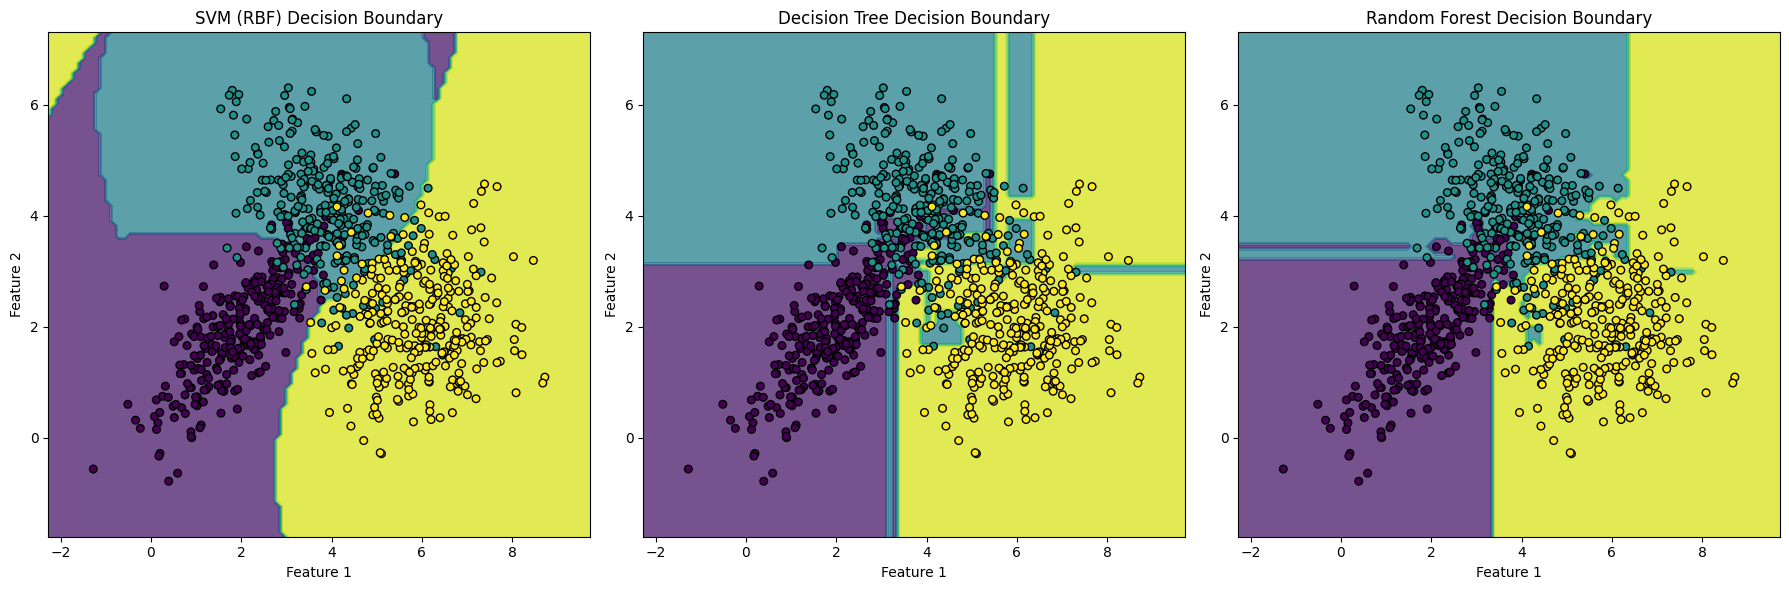

Model: SVM (RBF)
Accuracy: 0.881
Precision: 0.882
Recall: 0.894
Confusion Matrix:
[[76  7  0]
 [ 6 88 17]
 [ 0  2 74]]

Model: Decision Tree
Accuracy: 0.844
Precision: 0.844
Recall: 0.853
Confusion Matrix:
[[75  5  3]
 [10 86 15]
 [ 0  9 67]]

Model: Random Forest
Accuracy: 0.852
Precision: 0.852
Recall: 0.865
Confusion Matrix:
[[75  6  2]
 [10 84 17]
 [ 0  5 71]]



In [ ]:
results = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.75)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30)
    ax.set_title(f'{name} Decision Boundary')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
   
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    confusion = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "confusion_matrix": confusion
    }

plt.tight_layout()
plt.show()

for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}\n")

**Аналіз отриманих результатів**:

1.   SVM (RBF) показує найкращі результати на задачах з нелінійними межами, оскільки здатен адаптуватися до складних топологій даних.

2.   Random Forest є сильною моделлю для більшості практичних задач, особливо коли є ризик переобучення або дуже велика кількість варіантів.

3.    Decision Tree може бути менш ефективним, якщо не застосовувати техніки регуляризації, оскільки вона схильна до переобучення на складних даних.